## Sentiment Analysis Using NLP(Natural Language Processing) + Logistic Regression

Importing The Required Libraries

In [2]:
import pandas as pd
import seaborn as sns
import re
from nltk import word_tokenize
from nltk.stem import PorterStemmer 
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score,r2_score,precision_score,recall_score,confusion_matrix
import nltk

In [3]:
%%script false
nltk.download('stopwords')

Couldn't find program: 'false'


Loading The Dataset

In [4]:
dataset = pd.read_csv("Dataset/IMDB Dataset.csv")
dataset.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


Data Preprocessing

In [5]:
def prepare_output(text):
    if(text == "positive"):
        return 1
    else:
        return 0

In [6]:
dataset["sentiment"] = dataset["sentiment"].apply(prepare_output)
dataset.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


Remove Punctuations

In [7]:
def remove_punctuations(words):
    return re.sub(r'[^\w\s]', '', words)
dataset["review"] = dataset["review"].apply(remove_punctuations)
dataset.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production br br The filmin...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically theres a family where a little boy J...,0
4,Petter Matteis Love in the Time of Money is a ...,1


Tokenization
* Spliting the sentences into words 

In [8]:
dataset["review"] = dataset["review"].apply(word_tokenize)
dataset.head()

,review,sentiment
0,"[One, of, the, other, reviewers, has, mentione...",1
1,"[A, wonderful, little, production, br, br, The...",1
2,"[I, thought, this, was, a, wonderful, way, to,...",1
3,"[Basically, theres, a, family, where, a, littl...",0
4,"[Petter, Matteis, Love, in, the, Time, of, Mon...",1


Stemming + Removing Stop Words
* Bringing All The Words Into Their Root Form

In [9]:
stemmer =PorterStemmer()
stop_words = set(stopwords.words('english'))
def stem_words(array):
    words_array = [w for w in array if not w.lower() in stop_words]
    return [stemmer.stem(word) for word in words_array]
dataset["review"] = dataset["review"].apply(stem_words)
dataset.head()

,review,sentiment
0,"[one, review, mention, watch, 1, oz, episod, y...",1
1,"[wonder, littl, product, br, br, film, techniq...",1
2,"[thought, wonder, way, spend, time, hot, summe...",1
3,"[basic, there, famili, littl, boy, jake, think...",0
4,"[petter, mattei, love, time, money, visual, st...",1


Vectorization

In [10]:
dataset["stemmed_words"] = dataset["review"].apply(lambda x : " ".join(x))
tfid = TfidfVectorizer()
input_features = tfid.fit_transform(dataset["stemmed_words"])

Building The Model

In [11]:
y = dataset["sentiment"]
X_train,X_test,Y_train,Y_test = train_test_split(input_features,y,test_size=0.2)
model = LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

Model Evaluation

In [12]:
y_preds_test = model.predict(X_test)
y_preds_train = model.predict(X_train)
def model_eval(y_preds_test,y_preds_train):
    data = {
        "Accuracy_Train": accuracy_score(y_preds_train,Y_train),
        "Accuracy_Test": accuracy_score(y_preds_test,Y_test),
        "r2_Score_Train": r2_score(y_preds_train,Y_train),
        "r2_Score_Test": r2_score(y_preds_test,Y_test),
        "Precision_Train": precision_score(y_preds_train,Y_train),
        "Precision_Test": precision_score(y_preds_test,Y_test),
        "Recall_Score_Train": recall_score(y_preds_train,Y_train),
        "Recall_Score_Test": recall_score(y_preds_test,Y_test)
    }
    return data

In [13]:
print(model_eval(y_preds_test,y_preds_train))

{'Accuracy_Train': 0.929575, 'Accuracy_Test': 0.8932, 'r2_Score_Train': 0.7182014578678018, 'r2_Score_Test': 0.5727653939969138, 'Precision_Train': 0.9380707620140726, 'Precision_Test': 0.9008264462809917, 'Recall_Score_Train': 0.9226465102581721, 'Recall_Score_Test': 0.8858275520317146}


<Axes: >

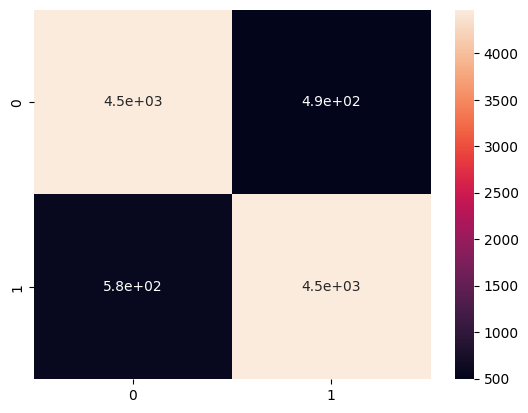

In [14]:
cm = confusion_matrix(y_preds_test,Y_test)
sns.heatmap(cm,annot=True)

Prediction

In [15]:
def prediction_preprocess(text):
    text_punc = re.sub(r'[^\w\s]', '', text)
    text_tokenize = word_tokenize(text_punc)
    words_array = [w for w in text_tokenize if not w.lower() in stop_words]
    text_stemming = [stemmer.stem(word) for word in words_array]
    text_join = " ".join(text_stemming)
    input_features = tfid.transform([text_join])
    return input_features

In [24]:
text = "This is a shit film, useless and idiotic of life. I enjoyed the animated one and I equally love this one. You don't need to compare live to animation, just enjoy the ride"
text_preprocess = prediction_preprocess(text)
prediction = model.predict(text_preprocess.reshape(1,-1))
print(f"Predicted Review : {'Postive' if prediction else "Negative"}")


Predicted Review : Postive
